In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/df1-dataset/df1.csv
/kaggle/input/amazon-product-reviews/Reviews.csv


In [2]:
pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 67.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 99.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.7/648.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# 1. Data Ingestion and Preprocessing:

In [76]:
df=pd.read_csv("/kaggle/input/amazon-product-reviews/Reviews.csv")

In [77]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.shape

(568454, 10)

#### Removing unneccessary Columns

In [78]:
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],axis=1,inplace=True)

In [14]:
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [79]:
## Checking Missing Values
df.isna().sum()

Score    0
Text     0
dtype: int64

In [80]:

print('Number of Duplicate in the dataset:',df.duplicated().sum())

Number of Duplicate in the dataset: 174779


#### Here no **missing** values but  have **duplicate** values, need to be removed

In [81]:
df.drop_duplicates(inplace=True)

In [72]:
df.duplicated().sum()

0

In [73]:
df.shape

(393675, 2)

### EDA ( Exploratery Data Analysis)

In [17]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

<Axes: xlabel='Score', ylabel='count'>

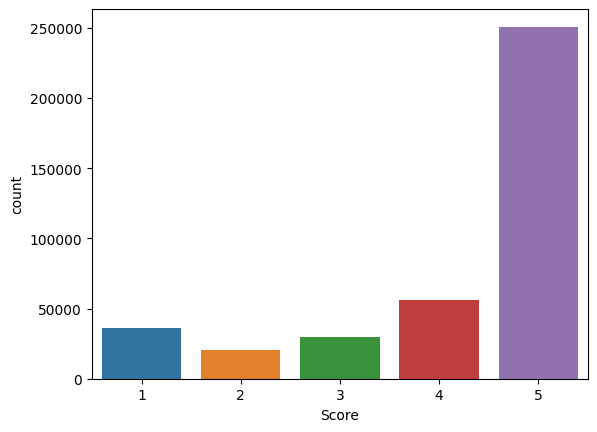

In [13]:
sns.countplot(x=df['Score'])

#### Here We can Majority class is 5 , imbalanced classes in the dataset

In [17]:
df['Score'].value_counts()

Score
5    250745
4     56074
1     36280
3     29772
2     20804
Name: count, dtype: int64

In [18]:
df['Score'].value_counts()/len(df)*100

Score
5    63.693402
4    14.243729
1     9.215724
3     7.562583
2     5.284562
Name: count, dtype: float64

### observation 
#### 63% value scores are 5 in the dataset, so high volume of product reviews are positve

### Taking Samples from each scores 

In [82]:
# Sample required sizes for each class
neutral_size = 20900  # Score = 3
negative_size = 20900  # Score = 1 & 2
positive_size = 20900  # Score = 4 & 5

In [83]:
# Sampling each group
df_neutral = df[df['Score'] == 3].sample(neutral_size, random_state=42)

df_negative = df[df['Score'].isin([1, 2])].sample(negative_size, random_state=42)

df_positive = df[df['Score'].isin([4, 5])].sample(positive_size, random_state=42)


In [84]:
df_balanced = pd.concat([df_neutral, df_negative, df_positive]).reset_index(drop=True)


In [85]:
df_balanced['Score'].value_counts()

Score
3    20900
5    16987
1    13290
2     7610
4     3913
Name: count, dtype: int64

In [86]:
df_balanced['Sentiment'] = df_balanced['Score'].map(lambda x: 'Negative' if x in [1, 2] 
                                                    else 'Neutral' if x == 3 
                                                    else 'Positive')

In [87]:
df1=df_balanced

#### By taking **20800** samples from each **score** , the data become balanced and we have 104000 raw data

In [88]:
df1.shape

(62700, 3)

<Axes: xlabel='Score', ylabel='count'>

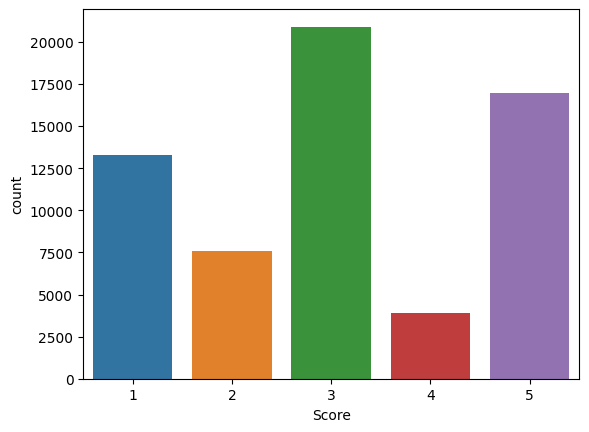

In [152]:
sns.countplot(x=df1['Score'])

<Axes: xlabel='Sentiment', ylabel='count'>

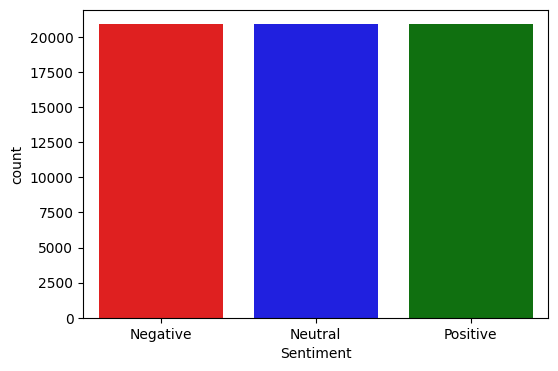

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x=df1['Sentiment'], order=['Negative', 'Neutral', 'Positive'], palette=['red', 'blue', 'green'])


##### As shown,```Sentiment``` Column is balanced and each value have the same distribution so the model won't be biased to specific value.

In [89]:
# Remove Score column , because we created sentiment columns instead of this
df1.drop('Score',axis=1,inplace=True)

### Text Preprocessing

In [91]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer,PorterStemmer


In [93]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
stop_words=set(stopwords.words('english'))

In [26]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [95]:
stemming=PorterStemmer()

In [96]:
def preprocess_text(text):
    # convert text into lower
    text=text.lower()

    # make tokens ( words)
    tokens=word_tokenize(text)

    # Remove punctuations (like: , ? , etc)
    tokens=[word for word in tokens if word not in string.punctuation]

    # Remove stopwords ( like : is , am , for ,etc
    tokens =[word for word in tokens if word not in stop_words]

    # Remove numbers
    tokens=[word for word in tokens if not word.isdigit()]

    # apply stemming
    tokens=[stemming.stem(word) for word in tokens]

    return ' '.join(tokens)
    

In [107]:
df1['cleaned_text']=df1['Text'].apply(preprocess_text)

In [98]:
# save the cleaned text
df1.to_csv('df1.csv')

In [3]:
df2=pd.read_csv('/kaggle/input/df1-dataset/df1.csv')

In [4]:
df2['Sentiment'].value_counts()

Sentiment
Neutral     20900
Negative    20900
Positive    20900
Name: count, dtype: int64

In [5]:
df2.head()

,Unnamed: 0,Text,Sentiment,cleaned_text
0,0,"Ok here we go again, another reviewer who says...",Neutral,ok go anoth review say bad high fructos corn s...
1,1,I wanted the reduced fat bisquick but was give...,Neutral,want reduc fat bisquick given heart healthi in...
2,2,Bassettss is commonly regarded as THE premium ...,Neutral,bassettss commonli regard premium brand all-so...
3,3,I ordered these to have at my son's Harry Pott...,Neutral,order son 's harri potter birthday parti kid f...
4,4,That's pretty much what these ramen noodles ha...,Neutral,'s pretti much ramen noodl spici love spici no...


In [6]:
df2['Sentiment'] = df2['Sentiment'].apply(lambda x: 0 if x=='Negative' else (1 if x == 'Neutral' else 2))

# Negative - 0
# Neutral - 1
# positive - 2

In [9]:
df2['Sentiment'].value_counts()

Sentiment
1    20900
0    20900
2    20900
Name: count, dtype: int64

In [7]:
X=df2['cleaned_text']
y=df2['Sentiment']

In [8]:
set(y)

{0, 1, 2}

### Vectorization and Modeling

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [10]:
import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn
from urllib.parse import urlparse


In [11]:
mlflow.set_tracking_uri("https://ef55-150-129-100-21.ngrok-free.app")
mlflow.set_experiment("Amazon Product Review Sentimant Experiement")


<Experiment: artifact_location='/home/muhammed/Desktop/Amazon product review/artifacts/1', creation_time=1741196389486, experiment_id='1', last_update_time=1741196389486, lifecycle_stage='active', name='Amazon Product Review Sentimant Experiement', tags={'mlflow.sharedViewState.60b5838b3c07b10d688fd52b4dd6c37593b139dcfb12d21877e12fcb552682f6': 'deflate;eJxdUl1PwzAM/CsozxOC176VMT7EhlA3JqQJbVnirZbSpIqdsYL233HXQQePPt/5nHO+FIGOprxDxxBVptRAhWgh3jRP0EitmSOuEwNdEuvIS8YKelJORmUb7QgG6tifte1M5eOxkBxuwDTGwe/43DDuWr3VrAmYfjqL94GqggU3h0gYfK9w7qJInkRD4MAw2GFwqRIkW5yvt5qGFA2shHiOTtqh9B+97exXSmyjTB/ta+0tWJV9HTrkBb1v68WJ8YDWgu/rORKu0SE3E133so7Wmsrud4/FdLa8vloWr89T2WCH8DHRe6zwsx19yk1kYyT+MTihSLkxkrJkUcAx7TNJIriPIdVg59oloEc/LCV8iYRjkn6JFkZVzc1feNtqbuSsPjl3Kv89XScOBWwiUDnyeu3OTLcurLUbo4fj1GHwG9yKSu3zPVL3XYihPh7ew7QKgUsPJPZX/fHeWvIE5BSmk6jD4RvYX+ai'}>

In [15]:
# Split the data set into two part for training and testing 
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)


In [16]:
signature=infer_signature(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


### 1. Logistic Regression

In [189]:

with mlflow.start_run():
    mlflow.log_metric('test',1)
    mlflow.log_metric('nihas',2)

🏃 View run luminous-goose-271 at: https://0fdd-150-129-100-21.ngrok-free.app/#/experiments/1/runs/85ef4729d88a4786b104fae982721837
🧪 View experiment at: https://0fdd-150-129-100-21.ngrok-free.app/#/experiments/1


In [116]:
logistic_pipe=Pipeline(
    [
      ('vec',CountVectorizer(stop_words= "english")),
        ('Tf_idf',TfidfTransformer()),
        ('log_rg',LogisticRegression()),

    ]
)

In [60]:
log_fit = logistic_pipe.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
log_pred=logistic_pipe.predict(x_test)


In [62]:

print('Training accuracy:', log_fit.score(x_train,y_train))
print('Test accuracy:', log_fit.score(x_test,y_test))


Training accuracy: 0.7612240829346093
Test accuracy: 0.6759968102073365


<Axes: >

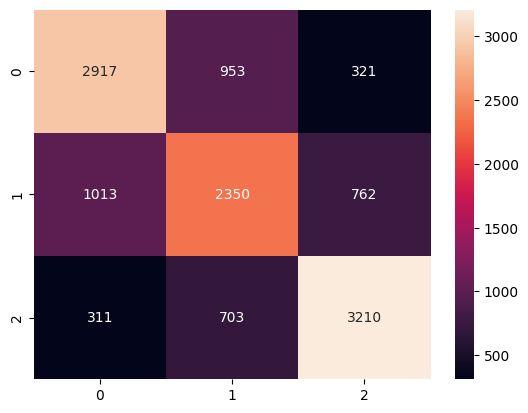

In [175]:
sns.heatmap(confusion_matrix(y_test,log_pred), annot=True, fmt="d")


In [176]:
print(classification_report(y_test, log_pred,digits=4))


              precision    recall  f1-score   support

           0     0.6878    0.6960    0.6919      4191
           1     0.5866    0.5697    0.5780      4125
           2     0.7477    0.7599    0.7538      4224

    accuracy                         0.6760     12540
   macro avg     0.6741    0.6752    0.6746     12540
weighted avg     0.6747    0.6760    0.6753     12540



### Observation
* Low False Negatives (FN = 321) → The model is not heavily misclassifying actual positives as negatives.
* This suggests that recall for the positive class is relatively high, meaning most positive reviews are correctly classified.

In [117]:
with mlflow.start_run(run_name="Logistic_Regression_Exp1"):
    log_fit = logistic_pipe.fit(x_train, y_train)
    y_pred = log_fit.predict(x_test)
    
    # Log training and test accuracy
    mlflow.log_metric("train_accuracy", log_fit.score(x_train, y_train))
    mlflow.log_metric("test_accuracy", log_fit.score(x_test, y_test))

    # Log classification report
    class_report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Log the model
    input_example = x_train.iloc[:5]
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    if tracking_url_type_store != 'file':
        mlflow.sklearn.log_model(log_fit, "model", registered_model_name="Logistic Regression Model")
    else:
        mlflow.sklearn.log_model(log_fit, "model", input_example=input_example)
    
    print('Training accuracy:', log_fit.score(x_train, y_train))
    print('Test accuracy:', log_fit.score(x_test, y_test))
    print(classification_report(y_test, y_pred, digits=4))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/03/06 07:08:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Logistic Regression Model' already exists. Creating a new version of this model...
2025/03/06 07:08:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression Model, version 4
Created ve

Training accuracy: 0.7612240829346093
Test accuracy: 0.6759968102073365
              precision    recall  f1-score   support

           0     0.6878    0.6960    0.6919      4191
           1     0.5866    0.5697    0.5780      4125
           2     0.7477    0.7599    0.7538      4224

    accuracy                         0.6760     12540
   macro avg     0.6741    0.6752    0.6746     12540
weighted avg     0.6747    0.6760    0.6753     12540

🏃 View run Logistic_Regression_Exp1 at: https://ef55-150-129-100-21.ngrok-free.app/#/experiments/1/runs/770510b5236f4415b5065a69f36afae5
🧪 View experiment at: https://ef55-150-129-100-21.ngrok-free.app/#/experiments/1


### 2. Decision Tree

In [119]:

dt_model_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier())])



In [120]:
with mlflow.start_run(run_name="Decision Tree Classifier"):
    dt_model = dt_model_pipeline.fit(x_train, y_train)
    y_pred_dt = dt_model_pipeline.predict(x_test)
    
    # Log training and test accuracy
    mlflow.log_metric("train_accuracy", dt_model_pipeline.score(x_train, y_train))
    mlflow.log_metric("test_accuracy", dt_model_pipeline.score(x_test, y_test))

    # Log classification report
    class_report = classification_report(y_test, y_pred_dt, digits=4, output_dict=True)
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Log the model
    input_example = pd.DataFrame(x_train.iloc[:5])
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme


    mlflow.sklearn.log_model(dt_model, "model", input_example=input_example)
    
    print('Training accuracy:', dt_model_pipeline.score(x_train, y_train))
    print('Test accuracy:', dt_model_pipeline.score(x_test, y_test))
    print(classification_report(y_test, y_pred_dt, digits=4))

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Training accuracy: 0.9998803827751196
Test accuracy: 0.5013556618819777
              precision    recall  f1-score   support

           0     0.5138    0.5018    0.5077      4191
           1     0.4253    0.4368    0.4310      4125
           2     0.5658    0.5639    0.5649      4224

    accuracy                         0.5014     12540
   macro avg     0.5016    0.5009    0.5012     12540
weighted avg     0.5022    0.5014    0.5017     12540

🏃 View run Decision Tree Classifier at: https://ef55-150-129-100-21.ngrok-free.app/#/experiments/1/runs/2eaf484ffe5144f38a225c819b19f892
🧪 View experiment at: https://ef55-150-129-100-21.ngrok-free.app/#/experiments/1


#### Here We can see Training accuracy is 99% and testing accuracy is 50% , so this model is overfited

## Random Forest Classifier

In [121]:
rf_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [122]:

with mlflow.start_run(run_name="RandomForest_SentimentAnalysis"):

    # Train the model
    rf_fit = rf_pipeline.fit(x_train, y_train)
    
    # Predictions
    y_pred = rf_fit.predict(x_test)

    # Log accuracy
    train_acc = rf_fit.score(x_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("test_accuracy", test_acc)

    # Log classification report
    class_report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Log model
    input_example = pd.DataFrame(x_train.iloc[:5])  # Ensure it's a DataFrame
    mlflow.sklearn.log_model(rf_fit, "model", input_example=input_example)

    # Print results
    print(f"Training Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
    print(classification_report(y_test, y_pred, digits=4))


/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Training Accuracy: 0.9998803827751196
Test Accuracy: 0.6474481658692185
              precision    recall  f1-score   support

           0     0.6574    0.6767    0.6669      4191
           1     0.5669    0.5338    0.5499      4125
           2     0.7096    0.7294    0.7194      4224

    accuracy                         0.6474     12540
   macro avg     0.6446    0.6466    0.6454     12540
weighted avg     0.6452    0.6474    0.6461     12540

🏃 View run RandomForest_SentimentAnalysis at: https://ef55-150-129-100-21.ngrok-free.app/#/experiments/1/runs/31c83bd1373c4dc6b9745e1caca9f784
🧪 View experiment at: https://ef55-150-129-100-21.ngrok-free.app/#/experiments/1


#### Here We can see Training accuracy is 99% and testing accuracy is 64% , so this model is overfited

In [125]:

rf_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=350,max_depth=80,min_samples_split=4,min_samples_leaf=2,max_features='sqrt',bootstrap=True,random_state=42))
])

In [126]:

with mlflow.start_run(run_name="RandomForest_SentimentAnalysis4"):

    # Train the model
    rf_fit = rf_pipeline.fit(x_train, y_train)
    
    # Predictions
    y_pred = rf_fit.predict(x_test)

    # Log accuracy
    train_acc = rf_fit.score(x_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("test_accuracy", test_acc)

    # Log classification report
    class_report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Log model
    input_example = pd.DataFrame(x_train.iloc[:5])  # Ensure it's a DataFrame
    mlflow.sklearn.log_model(rf_fit, "model", input_example=input_example)

    # Print results
    print(f"Training Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
    print(classification_report(y_test, y_pred, digits=4))


/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Training Accuracy: 0.8810207336523126
Test Accuracy: 0.6556618819776715
              precision    recall  f1-score   support

           0     0.6782    0.6769    0.6776      4191
           1     0.5808    0.5384    0.5588      4125
           2     0.6980    0.7491    0.7226      4224

    accuracy                         0.6557     12540
   macro avg     0.6523    0.6548    0.6530     12540
weighted avg     0.6528    0.6557    0.6537     12540

🏃 View run RandomForest_SentimentAnalysis4 at: https://ef55-150-129-100-21.ngrok-free.app/#/experiments/1/runs/8cf5d75fb9784def9d2ed10564aab4b0
🧪 View experiment at: https://ef55-150-129-100-21.ngrok-free.app/#/experiments/1


### LSTM

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers

In [18]:
X=df2['cleaned_text'].values
y=df2['Sentiment'].values

In [19]:

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X)
sequences=tokenizer.texts_to_sequences(X)

In [20]:
sum([len(i) for i in sequences])/len(sequences)

46.39912280701754

#### **Average Length of a sequence is 46

In [21]:
len(sequences)

62700

In [22]:
 sequences[62699]

[115, 499, 501, 96, 21, 41, 1563, 1118, 116, 2, 136, 123, 198, 190, 377, 262]

In [33]:



# Padding sequences on x to have same length
max_len = 200  # Adjusted max length as x are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(y)

In [34]:
len(X[62699])

200

In [35]:

X[62699]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Define LSTM Parameters
voca_size=20000  # as input
embedding_size=200  # as output

In [48]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5)) 
model.add(Dense(3,activation='softmax',kernel_regularizer=regularizers.l2(0.02)))

In [49]:
import tensorflow as tf
import mlflow
import mlflow.tensorflow
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Enable MLflow autologging for TensorFlow
mlflow.tensorflow.autolog()

# Start MLflow run
with mlflow.start_run(run_name="LSTM"):
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=4)

    # Model checkpointing
    model_checkpoint = ModelCheckpoint(
        'best_model1.keras',  # File path where the model will be saved
        monitor='val_loss',  # Metric to monitor
        save_best_only=True,  # Save only the model with the best validation loss
        mode='min',  # 'min' because lower loss is better
        verbose=1  # Verbosity mode
    )

    # Train the LSTM model
    history1 = model.fit(
        X_train, y_train, 
        epochs=12, 
        batch_size=128, 
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=1)

    # Log validation results in MLflow
    mlflow.log_metric("val_loss", val_loss)
    mlflow.log_metric("val_accuracy", val_accuracy)

    # Log the best model
    mlflow.log_artifact('best_model1.keras')

    # End MLflow run
    mlflow.end_run()


2025/03/06 16:25:33 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_7' has no defined input shape yet.


Epoch 1/12
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.5351 - loss: 0.9791
Epoch 1: val_loss improved from inf to 0.75906, saving model to best_model1.keras
392/392 ━━━━━━━━━━━━━━━━━━━━ 110s 273ms/step - accuracy: 0.5353 - loss: 0.9788 - val_accuracy: 0.6676 - val_loss: 0.7591
Epoch 2/12
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.6977 - loss: 0.7177
Epoch 2: val_loss improved from 0.75906 to 0.75571, saving model to best_model1.keras
392/392 ━━━━━━━━━━━━━━━━━━━━ 108s 276ms/step - accuracy: 0.6977 - loss: 0.7177 - val_accuracy: 0.6768 - val_loss: 0.7557
Epoch 3/12
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.7347 - loss: 0.6573
Epoch 3: val_loss did not improve from 0.75571
392/392 ━━━━━━━━━━━━━━━━━━━━ 108s 275ms/step - accuracy: 0.7347 - loss: 0.6573 - val_accuracy: 0.6702 - val_loss: 0.7644
Epoch 4/12
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.7585 - loss: 0.6120
Epoch 4: val_loss did not improve from 0.75571
392/392 ━━━━━━━━━━━━━━━

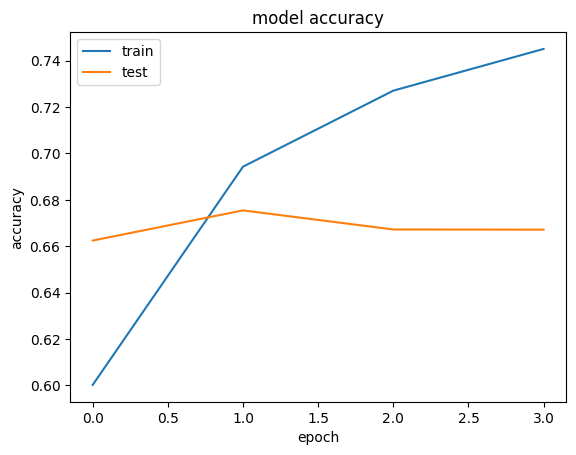

In [41]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
model.save("lstm_model.h5")


In [48]:
y_pred=model.predict(X_test)

392/392 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step


In [49]:
y_pred

array([[0.87220436, 0.10168556, 0.02611006],
       [0.8864078 , 0.08108342, 0.03250881],
       [0.31439757, 0.62133306, 0.06426939],
       ...,
       [0.01436761, 0.05770564, 0.9279267 ],
       [0.57896763, 0.40802002, 0.01301237],
       [0.22470945, 0.7406222 , 0.03466839]], dtype=float32)

In [50]:

y_pred_classes = np.argmax(y_pred, axis=1)
y_test

array([0, 0, 0, ..., 2, 0, 2])

In [51]:

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

NameError: name 'y_pred_classes' is not defined

In [55]:
import pickle

with open("lstm_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [54]:
# Save model architecture
model_json = model.to_json()

# Write JSON to a file
with open("lstm_model.json", "w") as f:
    f.write(model_json)

print("LSTM model architecture saved as 'lstm_model.json'")


LSTM model architecture saved as 'lstm_model.json'


### Almost 70% accuracy